In [1]:
import pandas as pd

In [2]:
import os 

In [3]:
os.getcwd()

'/Users/hbaktas/projects/practice/python-udemy/section6'

In [5]:
movies = pd.read_csv("P4-Movie-Ratings.csv")

In [6]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [7]:
len(movies)

559

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film                         559 non-null object
Genre                        559 non-null object
Rotten Tomatoes Ratings %    559 non-null int64
Audience Ratings %           559 non-null int64
Budget (million $)           559 non-null int64
Year of release              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [12]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [13]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating',
       'BudgetMillion', 'Year']

In [14]:
movies.columns

Index(['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillion',
       'Year'],
      dtype='object')

In [15]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillion,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [20]:
movies.Year = movies.Year.astype('category')

In [24]:
movies.Film = movies.Film.astype('category')

In [25]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillion,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [26]:
movies.Genre = movies.Genre.astype('category')

In [27]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillion,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [28]:
movies.Genre.unique()

[Comedy, Adventure, Action, Horror, Drama, Romance, Thriller]
Categories (7, object): [Comedy, Adventure, Action, Horror, Drama, Romance, Thriller]

In [29]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillion     559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [30]:
 movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [61]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= 8,4
import seaborn as sns 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [33]:
#jointplots

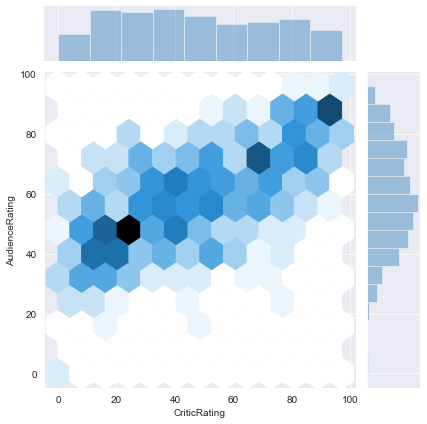

In [62]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')
#scatter" | "reg" | "resid" | "kde" | "hex"

In [46]:
#Histgram

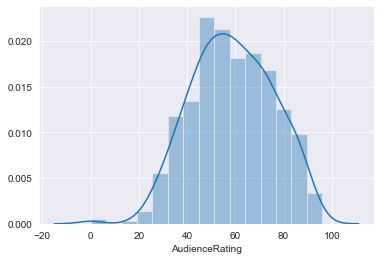

In [63]:
disc = sns.distplot(movies.AudienceRating, bins=15)

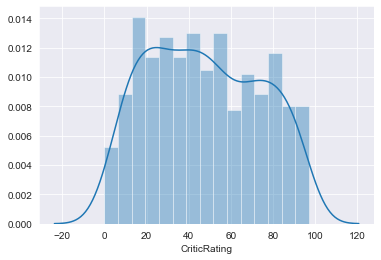

In [64]:
disc2 = sns.distplot(movies.CriticRating, bins=15)

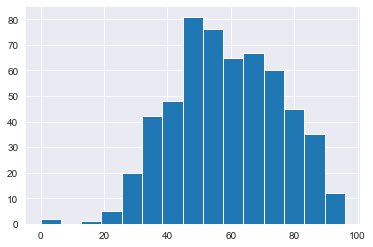

In [59]:
sns.set_style('darkgrid')
m1 = plt.hist(movies.AudienceRating, bins=15)

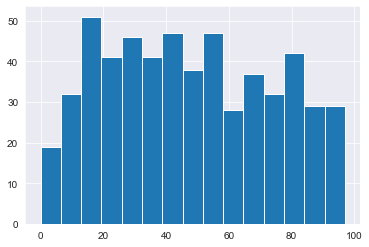

In [60]:
m1 = plt.hist(movies.CriticRating, bins=15)

In [65]:
#Stacked distribution charts

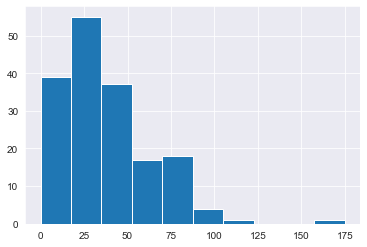

In [78]:
comedy = movies[movies.Genre== 'Comedy']
bgt = plt.hist(comedy.BudgetMillion)

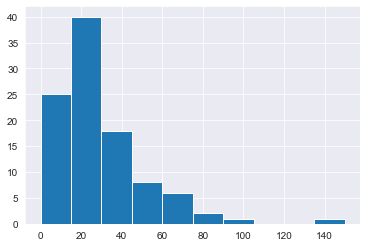

In [79]:
bgt2 = plt.hist(movies[movies.Genre== 'Drama'].BudgetMillion)

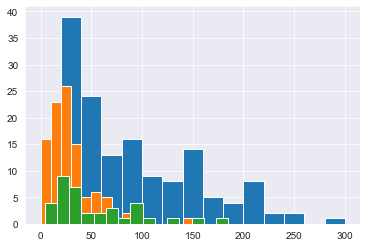

In [84]:
plt.hist(movies[movies.Genre== 'Action'].BudgetMillion, bins=15)
plt.hist(movies[movies.Genre== 'Drama'].BudgetMillion, bins=15)
plt.hist(movies[movies.Genre== 'Thriller'].BudgetMillion, bins=15)
plt.show()

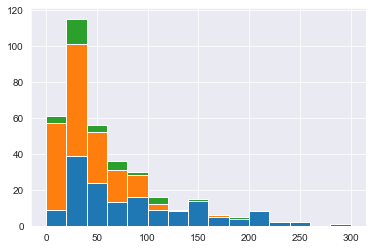

In [91]:
s = [movies[movies.Genre== 'Action'].BudgetMillion,
     movies[movies.Genre== 'Comedy'].BudgetMillion,
     movies[movies.Genre== 'Thriller'].BudgetMillion]
plt.hist(s, bins=15, stacked=True)
plt.show()

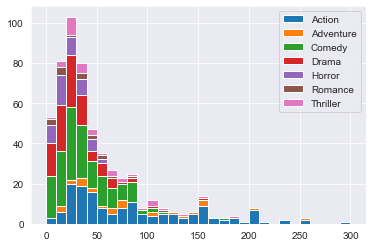

In [111]:
list1 = []
my_labels=[]
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre== gen].BudgetMillion)
    my_labels.append(gen)
plt.hist(list1, bins= 30, stacked=True,rwidth=1, label=my_labels)
plt.legend()
plt.show()

In [122]:
#KDE-Kernel-density-estimate PLOT

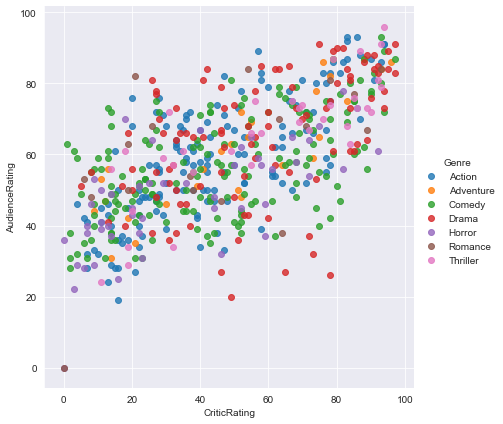

In [121]:
sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', fit_reg=False, hue='Genre', size=6,aspect=1)

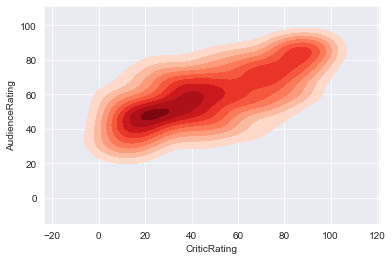

In [128]:
k1= sns.kdeplot(movies.CriticRating,movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds')

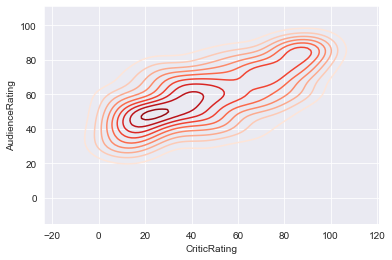

In [130]:
k1b= sns.kdeplot(movies.CriticRating,movies.AudienceRating, shade_lowest=False, cmap='Reds')

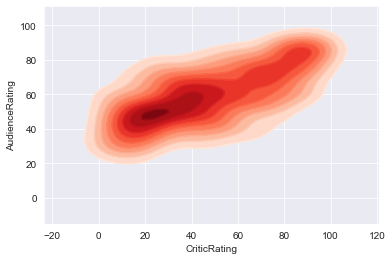

In [131]:
k12= sns.kdeplot(movies.CriticRating,movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds')
k1b2= sns.kdeplot(movies.CriticRating,movies.AudienceRating, shade_lowest=False, cmap='Reds')

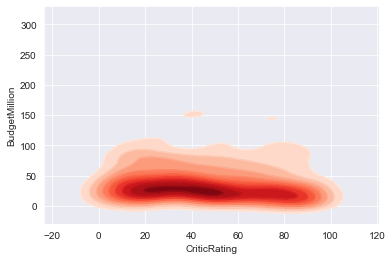

In [133]:
mc12= sns.kdeplot(movies.CriticRating,movies.BudgetMillion, shade=True, shade_lowest=False, cmap='Reds')
mc1b2= sns.kdeplot(movies.CriticRating,movies.BudgetMillion, shade_lowest=False, cmap='Reds')

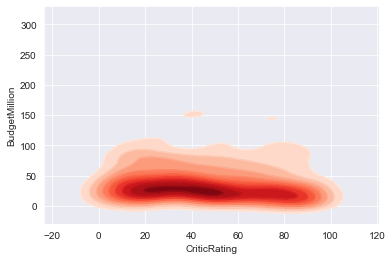

In [134]:
ma12= sns.kdeplot(movies.CriticRating,movies.BudgetMillion, shade=True, shade_lowest=False, cmap='Reds')
ma1b2= sns.kdeplot(movies.CriticRating,movies.BudgetMillion, shade_lowest=False, cmap='Reds')

In [136]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillion     559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


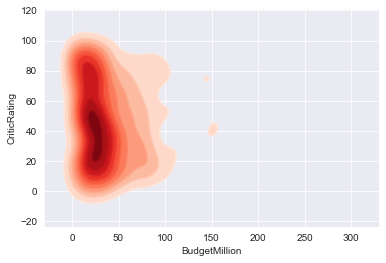

In [139]:
m12= sns.kdeplot(movies.BudgetMillion,movies.CriticRating, shade=True, shade_lowest=False, cmap='Reds')
m1b2= sns.kdeplot(movies.BudgetMillion,movies.CriticRating, shade_lowest=False, cmap='Reds')

In [140]:
#Working with subplots

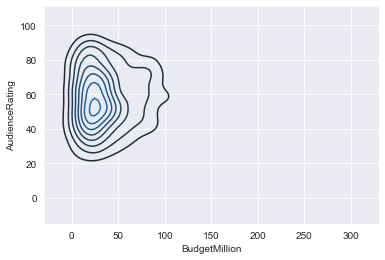

In [152]:
a = sns.kdeplot(movies.BudgetMillion,movies.AudienceRating)

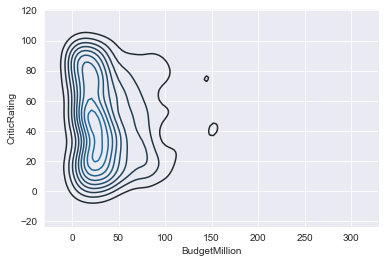

In [153]:
c = sns.kdeplot(movies.BudgetMillion,movies.CriticRating)

[(-20, 120)]

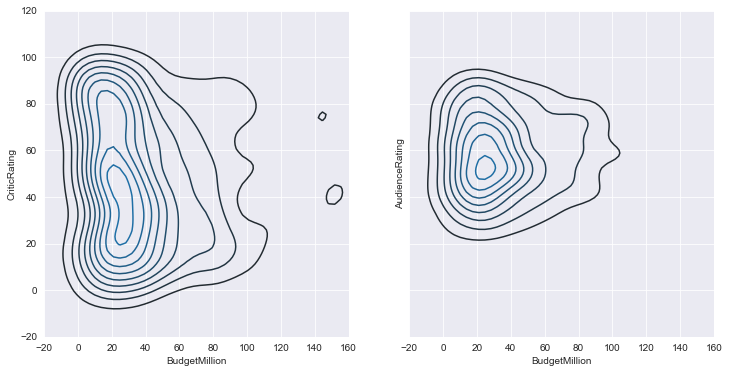

In [165]:
f, axes = plt.subplots(1,2, figsize=[12,6], sharex=True, sharey=True)
c = sns.kdeplot(movies.BudgetMillion,movies.CriticRating, ax=axes[0])
a = sns.kdeplot(movies.BudgetMillion,movies.AudienceRating, ax=axes[1])
c.set(xlim=[-20,160])
c.set(ylim=[-20,120])

In [166]:
#violon plot

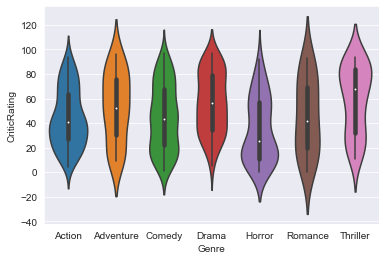

In [173]:
v = sns.violinplot(data=movies, x='Genre',y='CriticRating')

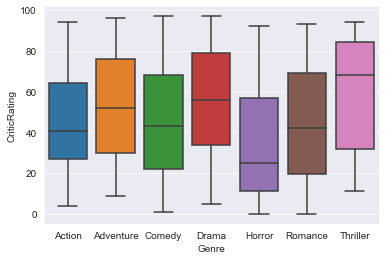

In [169]:
v = sns.boxplot(data=movies, x='Genre',y='CriticRating')

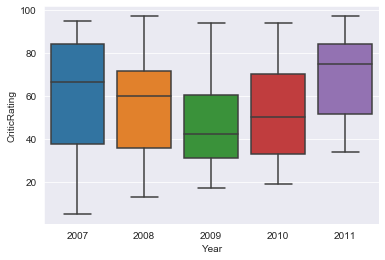

In [174]:
vy1 = sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year',y='CriticRating')

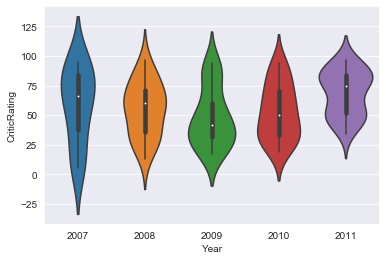

In [175]:
vy2 = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year',y='CriticRating')

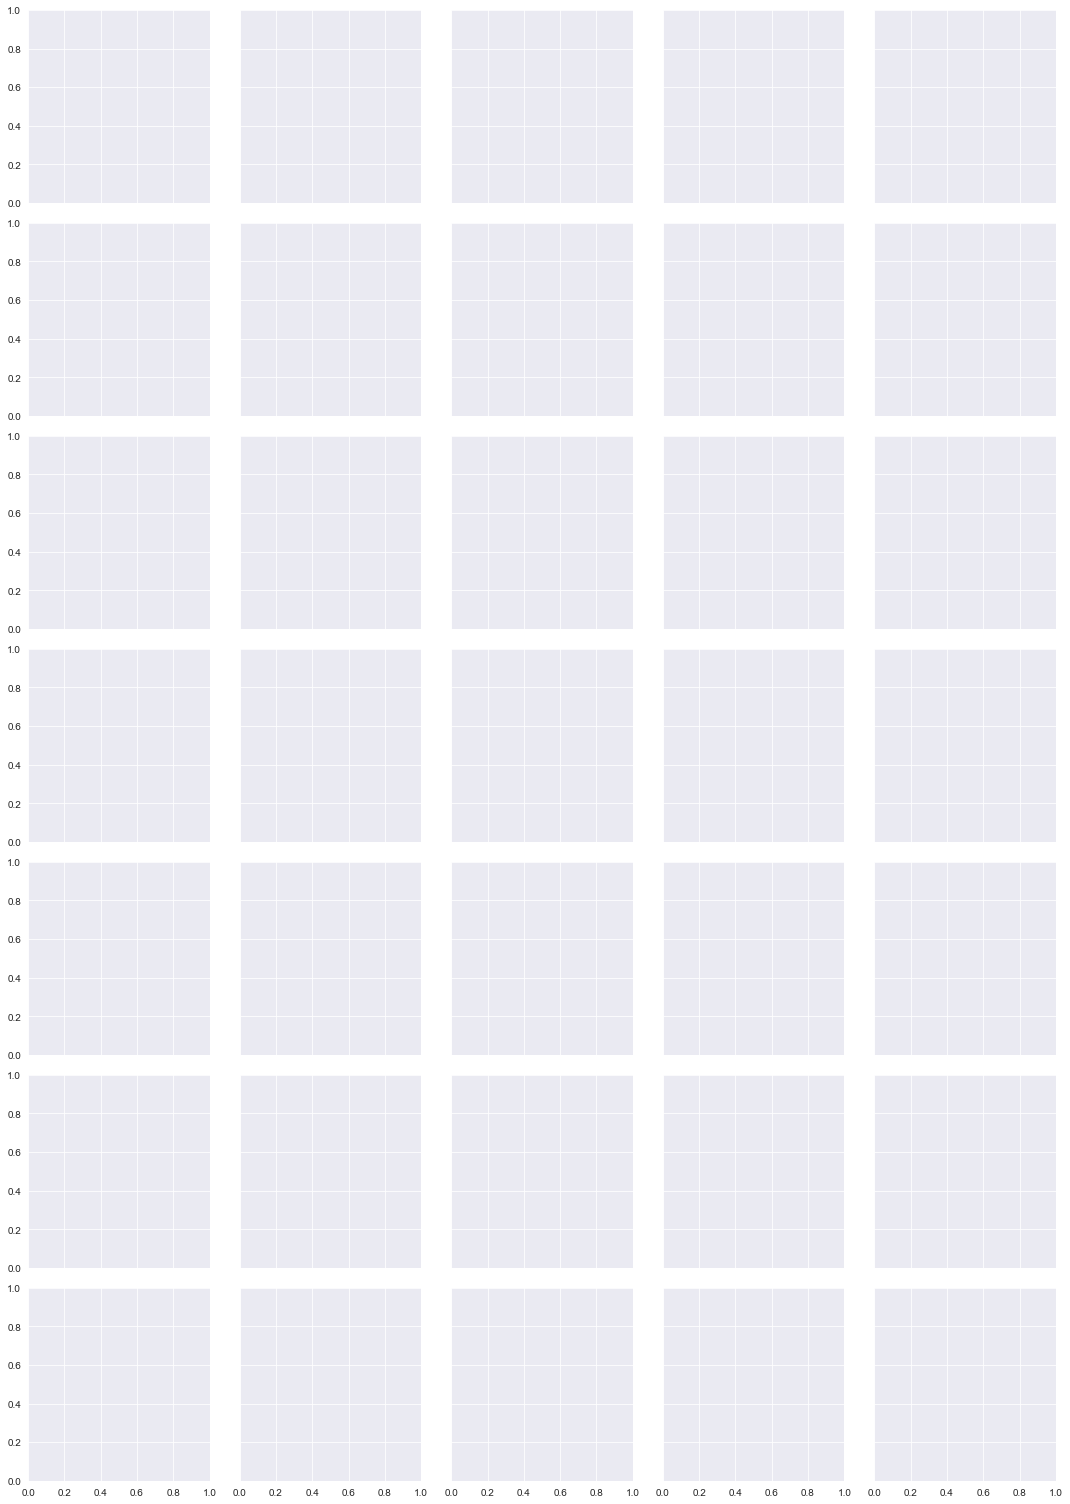

In [178]:
facet = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')

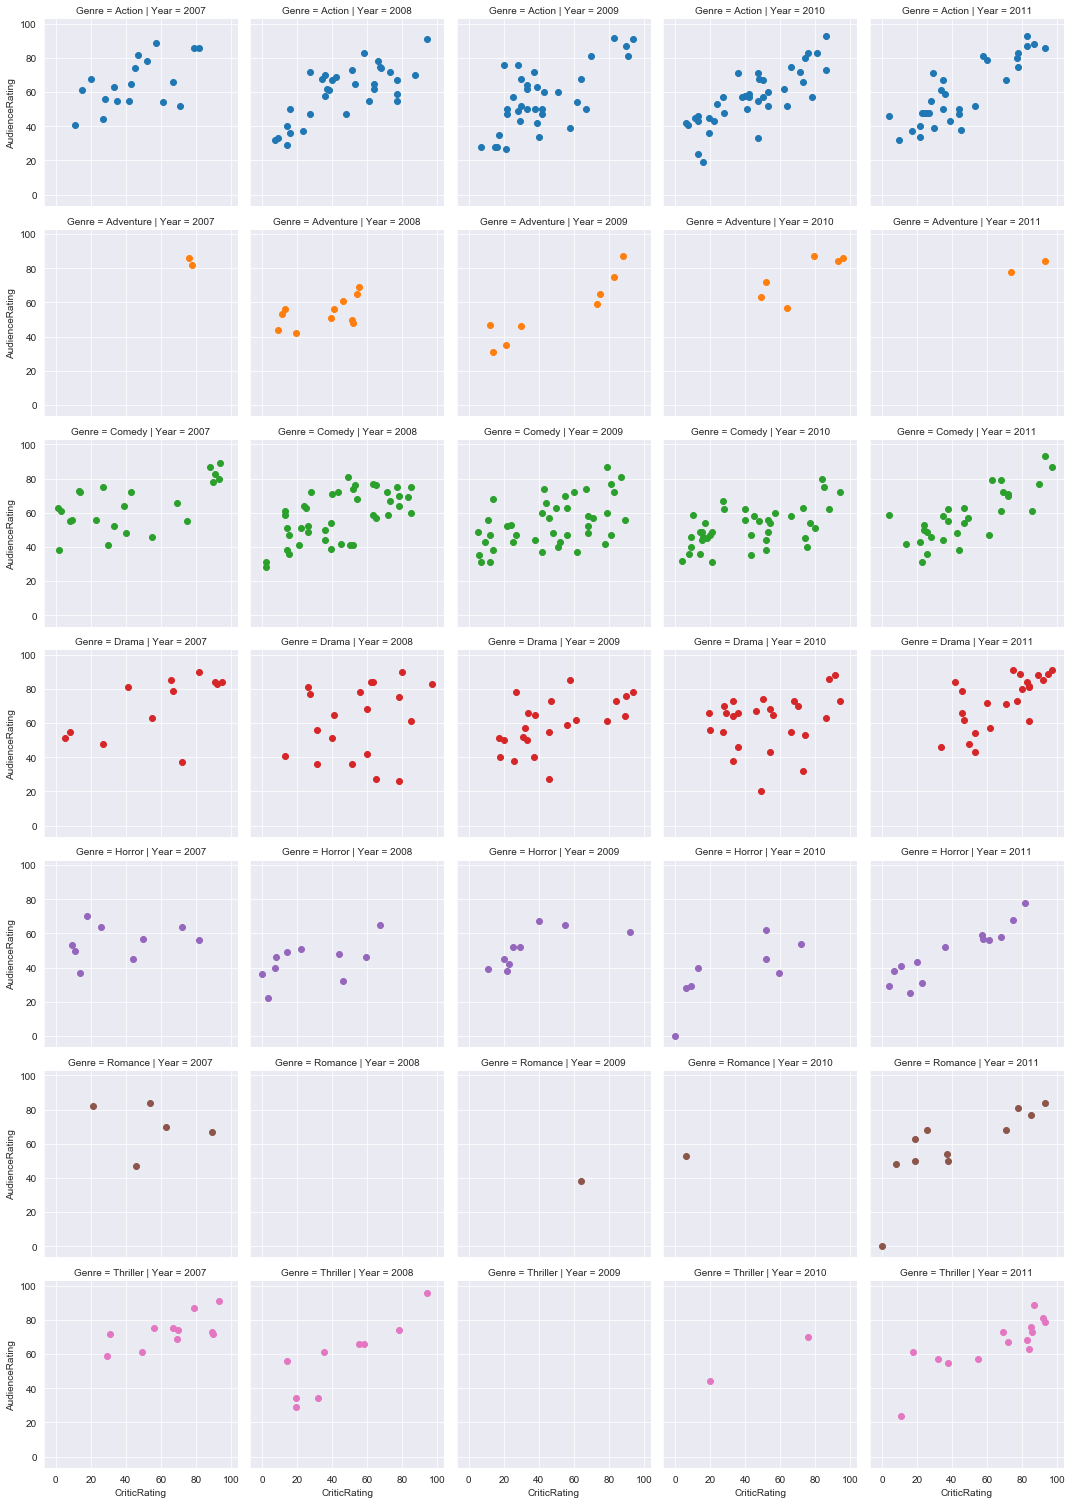

In [182]:
facet = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
facet = facet.map(plt.scatter,'CriticRating', 'AudienceRating')

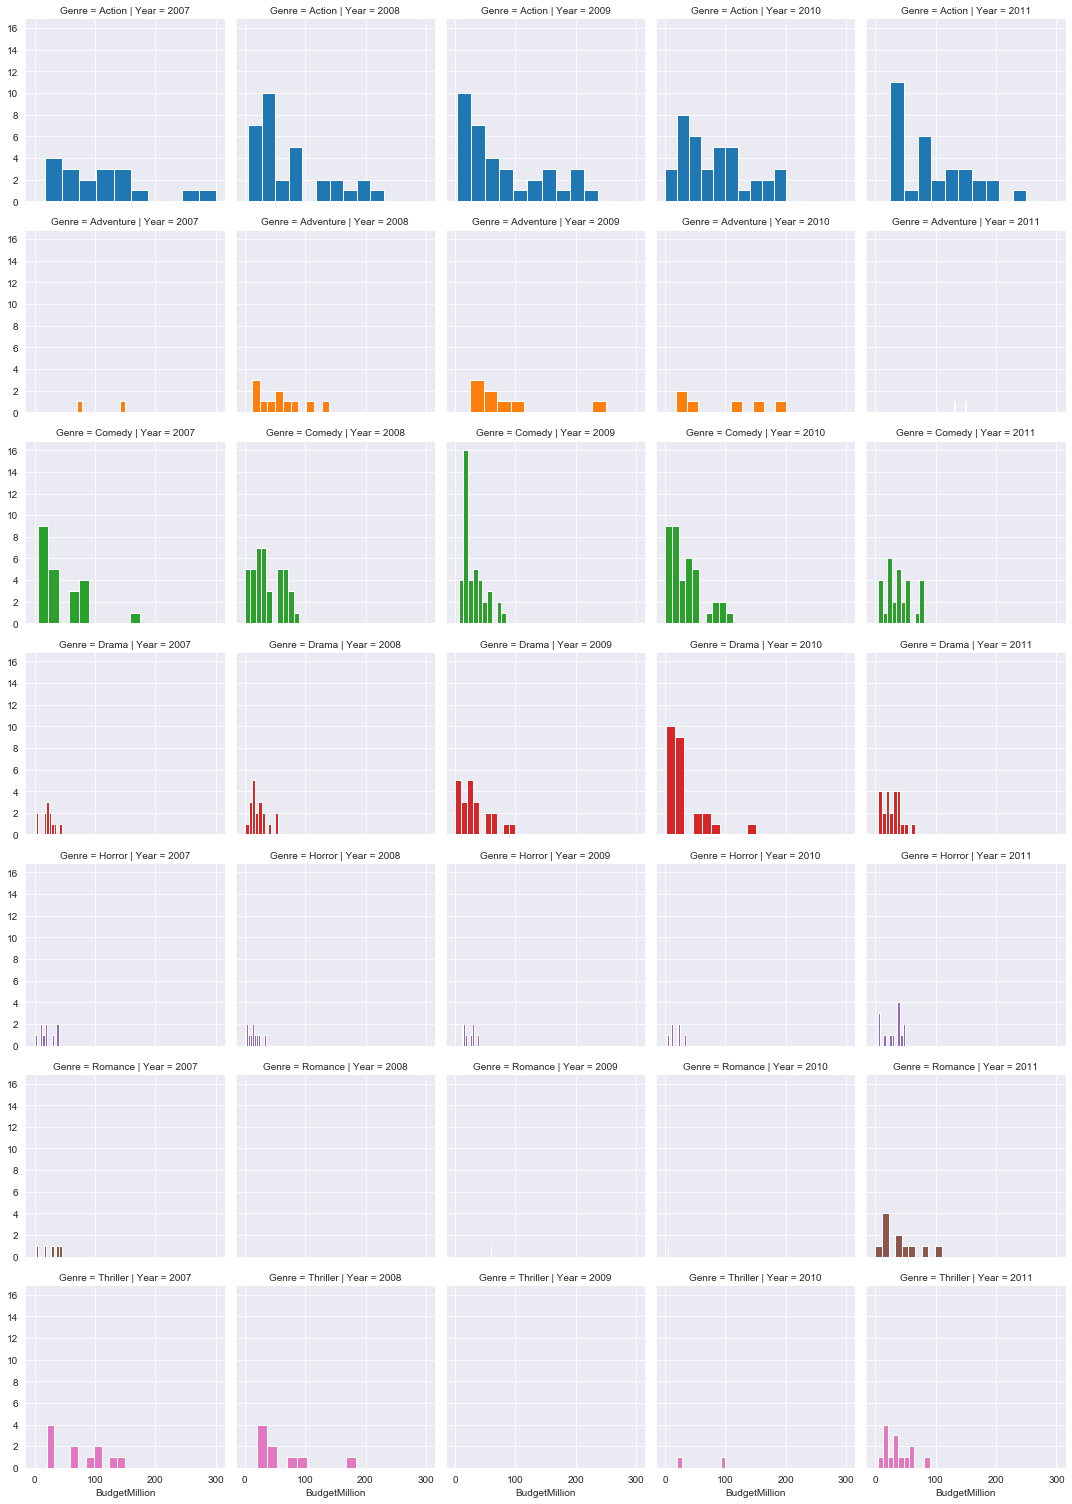

In [185]:
facetHist = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
facetHist = facetHist.map(plt.hist,'BudgetMillion')

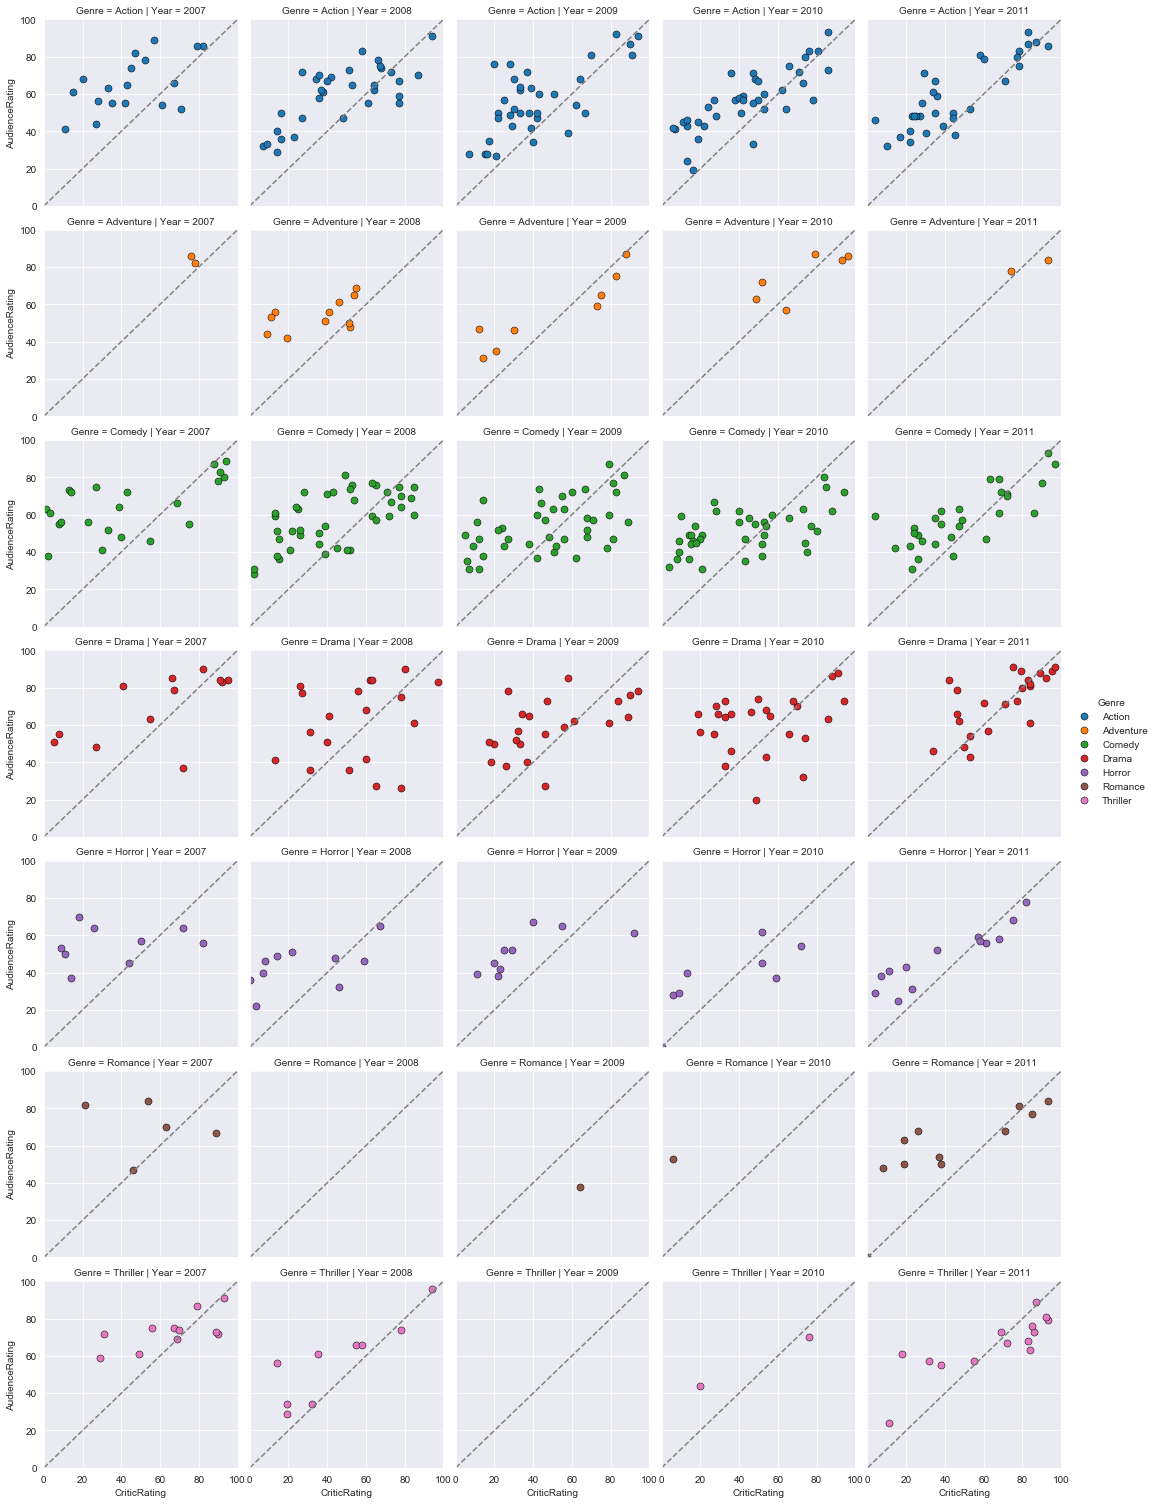

In [203]:
facet = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws=dict(s=50,linewidth=0.5,edgecolor='black')
facet = facet.map(plt.scatter,'CriticRating', 'AudienceRating',**kws)
facet.set(xlim=[0,100],ylim=[0,100])
for ax in facet.axes.flat:
    ax.plot((0,100),(0,100),c='gray', ls='--')
facet.add_legend()    


In [204]:
#5 is done